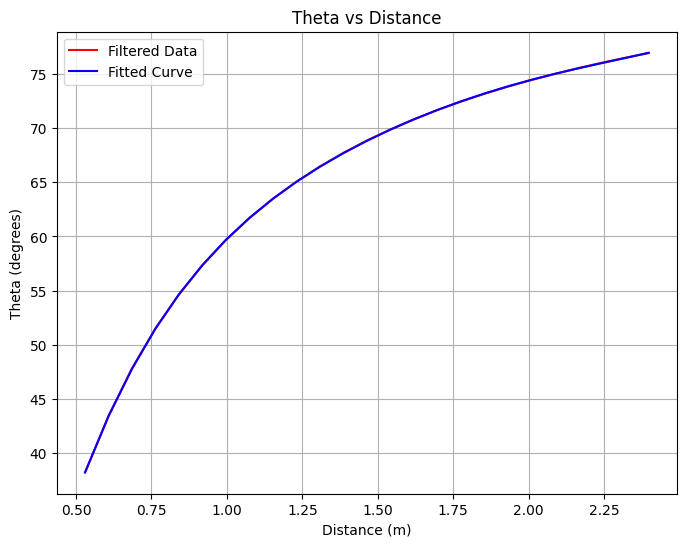

Fitted Curve Equation: 
        5         4         3       2
3.226 x - 28.95 x + 105.4 x - 200 x + 211.2 x - 31.05
Max error:  0.05164404242835019
Min error:  -0.04946737477757068


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, cos, sin, diff, N
from scipy.optimize import fsolve

# Define the symbols
theta = symbols('theta')
r = 7.75 / 39.37  # Convert inches to meters
axisheight = 13.995234 / 39.37  # Convert inches to meters

min_angle = 33  # Minimum angle in degrees
max_angle = 77  # Maximum angle in degrees

# Function to calculate theta for a given distance
def calculate_theta(distance, initial_theta=0.1):
    camera_x = r * cos(theta)
    camera_y = r * sin(theta) + axisheight

    slope_lever = sin(theta) / cos(theta)
    slope_los = -1 / slope_lever

    f_theta = 0 - camera_y - slope_los * (distance - camera_x)
    f_prime_theta = diff(f_theta, theta)

    theta_val = initial_theta
    tolerance = 1e-10
    max_iterations = 100000
    for _ in range(max_iterations):
        f_val = N(f_theta.subs(theta, theta_val))
        f_prime_val = N(f_prime_theta.subs(theta, theta_val))
        if abs(f_prime_val) < 1e-6:
            break
        theta_next = theta_val - f_val / f_prime_val
        if abs(theta_next - theta_val) < tolerance:
            break
        theta_val = theta_next % (2 * np.pi)
    return float(theta_val)

# Generate distances using linspace
max_distance = 8  # Maximum distance in meters
num_samples = 100  # Number of samples
distances = np.linspace(r + 0.1, max_distance, num_samples)

# Arrays to store x and y data
x_data = []
y_data = []

# Calculate theta for each distance and store in arrays
for distance in distances:
    theta_val = calculate_theta(distance) * 180 / np.pi
    if min_angle < theta_val < max_angle:  # Filter based on angle criteria
        x_data.append(distance)
        y_data.append(theta_val)

# Perform a poly fit
coefficients = np.polyfit(x_data, y_data, 5)

# Create a polynomial function with the obtained coefficients
cubic_fit = np.poly1d(coefficients)

# Generate y values using the cubic fit function
fitted_y = cubic_fit(x_data)

# Plotting the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'r-', label='Filtered Data')
plt.plot(x_data, fitted_y, 'b-', label='Fitted Curve')
plt.xlabel('Distance (m)')
plt.ylabel('Theta (degrees)')
plt.title('Theta vs Distance')
plt.legend()
plt.grid(True)
plt.show()

# Display polynomial equation of the fit
print('Fitted Curve Equation: \n', np.poly1d(cubic_fit))

error = fitted_y - y_data
max_error = np.max(error)
min_error = np.min(error)
print("Max error: ", max_error)
print("Min error: ", min_error)
